In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [10]:
dataset = pd.read_csv(r'C:\Users\Morgan Smith\Desktop\university\data mining\CW_ModelDevelopment_no_edit.csv')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
training_dataset, testing_dataset = train_test_split(dataset, test_size=0.20, random_state=42)

In [13]:
#training
train_independent_x = training_dataset.iloc[:, 2: -1]
train_dependent_y = training_dataset.iloc[:,-1]

#testing
test_independent_x = testing_dataset.iloc[:, 2: -1]
test_dependent_y = testing_dataset.iloc[:,-1]

In [14]:
from sklearn.preprocessing import LabelEncoder

#training
label_encoder = LabelEncoder()
binary_train_dependent_y = label_encoder.fit_transform(train_dependent_y)

#testing
label_encoder1 = LabelEncoder()
binary_test_dependent_y = label_encoder1.fit_transform(test_dependent_y)

In [15]:
b_y=pd.DataFrame(binary_train_dependent_y)
b_y.value_counts()

0    10427
1     1573
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
#training
train_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_imputer.fit(train_independent_x)
updated_train_independent_x = train_imputer.transform(train_independent_x)

#testing
test_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_imputer.fit(test_independent_x)
updated_test_independent_x = test_imputer.transform(test_independent_x)

# Using overSampling to balance the data

In [129]:
from imblearn.over_sampling import RandomOverSampler
#training
st=RandomOverSampler(0.50, random_state=42)
x_train_st, y_train_st = st.fit_resample(updated_train_independent_x, binary_train_dependent_y)

#testing
x_test_st1, y_test_st1 = st.fit_resample(updated_test_independent_x, binary_test_dependent_y)

C:\Users\Morgan Smith\anaconda3\envs\gpu_nb\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [130]:
from sklearn.decomposition import PCA

#training
pca = PCA(n_components=15)
pca.fit(x_train_st)
pca_train_x = pca.transform(x_train_st)

#testing
pca = PCA(n_components=15)
pca.fit(x_test_st1)
pca_test_x = pca.transform(x_test_st1)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, classification_report, matthews_corrcoef, mean_squared_error

In [132]:
model = RandomForestClassifier()
model.fit(pca_train_x, y_train_st)

RandomForestClassifier()

In [133]:
y_prediction = cross_val_predict(model, pca_test_x, y_test_st1, cv=10)
#y_prediction = knn_model.predict(pca_test_x)
accuracy = model.score(pca_test_x, y_prediction)
error_rate = 1- accuracy

# Predict probabilities

In [134]:
r_prob = [0 for _ in range(len(y_test_st1))]
nb_prob = model.predict_proba(pca_test_x)

In [135]:
nb_prob = nb_prob[:,1]

# Computing AUROC and ROC curve values

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score

In [137]:
r_auc = roc_auc_score(y_test_st1, r_prob)
nb_auc = roc_auc_score(y_test_st1, nb_prob)

In [138]:
print(r_auc)
print(nb_auc)

0.5
0.856677024657619


# calculate ROC curve

In [139]:
r_fpr, r_tpr, _ = roc_curve(y_test_st1, r_prob)
nb_fpr, nb_tpr, _ = roc_curve(y_test_st1, nb_prob)

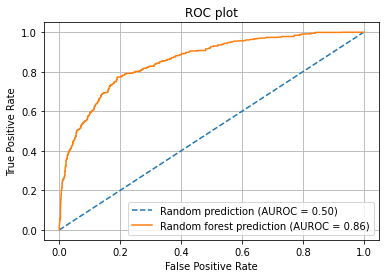

In [140]:
import matplotlib.pylab as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.2F)' % r_auc)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='Random forest prediction (AUROC = %0.2F)' % nb_auc)

plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [141]:
print('Error rate: ', error_rate)
print('\n')
print('f1 score for knn: ', f1_score(y_test_st1, y_prediction)) 
print('\n')
print('MCC: ', matthews_corrcoef(y_test_st1, y_prediction))
print('\n')
print('confusion matrix: \n', confusion_matrix(y_test_st1, y_prediction))

Error rate:  0.28029531568228105


f1 score for knn:  0.9669075694180297


MCC:  0.9502824504697891


confusion matrix: 
 [[2570   49]
 [  38 1271]]


In [142]:
print(classification_report(y_test_st1, y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2619
           1       0.96      0.97      0.97      1309

    accuracy                           0.98      3928
   macro avg       0.97      0.98      0.98      3928
weighted avg       0.98      0.98      0.98      3928

